In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
data_set = pd.read_csv("diabetes.csv")
data_set.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data_set.shape

(768, 9)

In [4]:
data_set.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data_set["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
##Outcome-wise mean for every column

data_set.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [7]:
X_data_set = data_set.drop(columns = "Outcome", axis=1)
Y_data_set = data_set["Outcome"]

In [8]:
print(X_data_set)
X_data_set.shape

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


(768, 8)

In [9]:
print(Y_data_set)
Y_data_set.shape

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


(768,)

# Data Standardization

In [10]:
scalar = StandardScaler()

In [11]:
##To convert all the data to a similar range(0-1)

X = scalar.fit_transform(X_data_set)  ##wanted to standardize X_data_set

In [12]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [13]:
Y = Y_data_set

In [14]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [15]:
## splitting of data into training set and test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


# Building the model

In [17]:
classifier = svm.SVC(kernel="linear")

In [18]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [19]:
train_prediction = classifier.predict(X_train)
train_accuracy = accuracy_score(train_prediction, Y_train)
print("Accuracy on training set:", train_accuracy)

Accuracy on training set: 0.7866449511400652


In [20]:
test_prediction = classifier.predict(X_test)
test_accuracy = accuracy_score(test_prediction, Y_test)
print("Accuracy on test set:",test_accuracy)

Accuracy on test set: 0.7727272727272727


In [21]:
##Predicting model

input_array = (0,118,84,47,230,45.8,0.551,31)

input_array_as_numpy_array = np.asarray(input_array)
input_data_reshape = input_array_as_numpy_array.reshape(1,-1)
std_data = scalar.transform(input_data_reshape)
print(std_data)


prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')


[[-1.14185152 -0.09059057  0.77001375  1.66000666  1.30417549  1.75242756
   0.23896296 -0.19067191]]
[0]
The person is not diabetic


C:\Users\geeth_glh\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [22]:

input_data = (6,85,78,0,0,31.2,0.382,42)

input_data_as_numpy_data = np.asarray(input_data)
input_data_reshape = input_data_as_numpy_data.reshape(1,-1)
std_data = scalar.transform(input_data_reshape)
print(std_data)


prediction = classifier.predict(input_data_reshape)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[[ 0.63994726 -1.12339636  0.45982725 -1.28821221 -0.69289057 -0.10059342
  -0.2714371   0.74529338]]
[1]
The person is diabetic


C:\Users\geeth_glh\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
import pickle


In [24]:
filename = "trained_model.sav"

In [25]:
pickle.dump(classifier,open(filename,'wb'))

In [26]:
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [27]:

input_data = (6,85,78,0,0,31.2,0.382,42)

input_data_as_numpy_data = np.asarray(input_data)
input_data_reshape = input_data_as_numpy_data.reshape(1,-1)
std_data = scalar.transform(input_data_reshape)
print(std_data)


prediction = loaded_model.predict(input_data_reshape)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[[ 0.63994726 -1.12339636  0.45982725 -1.28821221 -0.69289057 -0.10059342
  -0.2714371   0.74529338]]
[1]
The person is diabetic


C:\Users\geeth_glh\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Comparing with other ML models

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [29]:
svc = SVC(kernel='linear', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [40]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb,

}

# Accuracy and precision function

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_pred,y_test)
    precision = precision_score(y_pred,y_test)
    
    return accuracy,precision

In [42]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.7727272727272727, 0.5185185185185185)

In [43]:
train_classifier(knc,X_train,Y_train,X_test,Y_test)

(0.7207792207792207, 0.4444444444444444)

# Calculating accuracy and precision for all teh classification models

In [44]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.7727272727272727
Precision -  0.5185185185185185
For  KN
Accuracy -  0.7207792207792207
Precision -  0.4444444444444444
For  DT
Accuracy -  0.7792207792207793
Precision -  0.5185185185185185
For  LR
Accuracy -  0.7597402597402597
Precision -  0.5185185185185185
For  RF
Accuracy -  0.7337662337662337
Precision -  0.48148148148148145
For  AdaBoost
Accuracy -  0.7142857142857143
Precision -  0.48148148148148145
For  BgC
Accuracy -  0.7207792207792207
Precision -  0.48148148148148145
For  ETC
Accuracy -  0.7402597402597403
Precision -  0.4444444444444444
For  GBDT
Accuracy -  0.7337662337662337
Precision -  0.48148148148148145
For  xgb
Accuracy -  0.7272727272727273
Precision -  0.5370370370370371


In [45]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
9,xgb,0.727273,0.537037
0,SVC,0.772727,0.518519
2,DT,0.779221,0.518519
3,LR,0.759740,0.518519
4,RF,0.733766,0.481481
5,AdaBoost,0.714286,0.481481
6,BgC,0.720779,0.481481
8,GBDT,0.733766,0.481481
1,KN,0.720779,0.444444
7,ETC,0.740260,0.444444


In [46]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,xgb,Accuracy,0.727273
1,SVC,Accuracy,0.772727
2,DT,Accuracy,0.779221
3,LR,Accuracy,0.759740
4,RF,Accuracy,0.733766
5,AdaBoost,Accuracy,0.714286
6,BgC,Accuracy,0.720779
7,GBDT,Accuracy,0.733766
8,KN,Accuracy,0.720779
9,ETC,Accuracy,0.740260


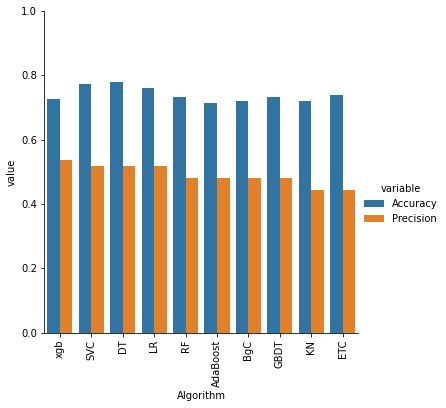

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.0,1.0)
plt.xticks(rotation='vertical')
plt.show()

# SVC and Decision Tree Voting

In [48]:
## comparing top 3 classifiers
## voting_classifier(It is the combination of multiple classifiers with equal weightage)
## Here the results might be better than individual classifiers

svc = SVC(kernel='linear', gamma=1.0,probability=True)
# xgb = XGBClassifier(n_estimators=50,random_state=2)
dtc = DecisionTreeClassifier(max_depth=5)

from sklearn.ensemble import VotingClassifier

In [61]:
voting1 = VotingClassifier(estimators=[('svm', svc), ('DT', dtc)],voting='hard')
voting1.fit(X_train,Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='linear',
                                  probability=True)),
                             ('DT', DecisionTreeClassifier(max_depth=5))])

In [63]:
## VOting_classifier predictions
y_pred = voting1.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred))
print("Precision",precision_score(Y_test,y_pred))

Accuracy 0.7597402597402597
Precision 0.84


# SVC and XGB voting

In [52]:

svc = SVC(kernel='linear', gamma=1.0,probability=True)
xgb = XGBClassifier(n_estimators=50,random_state=2)
from sklearn.ensemble import VotingClassifier

In [64]:
voting2 = VotingClassifier(estimators=[('svm', svc),('xgb',xgb) ],voting='hard')
voting2.fit(X_train,Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='linear',
                                  probability=True)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=2, ...))])

In [65]:
## VOting_classifier predictions
y_pred = voting2.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred))
print("Precision",precision_score(Y_test,y_pred))

Accuracy 0.7662337662337663
Precision 0.8214285714285714


# XGB and DecisionTree Voting

In [66]:
from sklearn.ensemble import VotingClassifier
voting3 = VotingClassifier(estimators=[('DT', dtc),('xgb',xgb) ],voting='hard')
voting3.fit(X_train,Y_train)

VotingClassifier(estimators=[('DT', DecisionTreeClassifier(max_depth=5)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=2, ...))])

In [67]:
## VOting_classifier predictions
y_pred = voting3.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred))
print("Precision",precision_score(Y_test,y_pred))

Accuracy 0.7532467532467533
Precision 0.8076923076923077


# LR and XGB voting

In [68]:
from sklearn.ensemble import VotingClassifier
voting4 = VotingClassifier(estimators=[('LR', lrc),('xgb',xgb) ],voting='hard')
voting4.fit(X_train,Y_train)

## VOting_classifier predictions
y_pred = voting4.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred))
print("Precision",precision_score(Y_test,y_pred))

Accuracy 0.7662337662337663
Precision 0.8214285714285714


# DT and LR Voting

In [70]:
from sklearn.ensemble import VotingClassifier
voting5 = VotingClassifier(estimators=[('DT', dtc),('LR', lrc) ],voting='hard')
voting5.fit(X_train,Y_train)

## VOting_classifier predictions
y_pred = voting5.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred))
print("Precision",precision_score(Y_test,y_pred))

Accuracy 0.7532467532467533
Precision 0.8076923076923077


# SVC, XGB, DecisionTress Stacking

In [55]:
# Applying stacking

estimators=[('svm', svc), ('xgb', xgb),('DT', dtc)]

final_estimator=RandomForestClassifier()

from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [56]:
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred))
print("Precision",precision_score(Y_test,y_pred))

Accuracy 0.7402597402597403
Precision 0.6521739130434783


In [71]:
##Predicting model

input_array = (5,88,66,21,23,24.4,0.342,30)

input_array_as_numpy_array = np.asarray(input_array)
input_data_reshape = input_array_as_numpy_array.reshape(1,-1)
std_data = scalar.transform(input_data_reshape)
print(std_data)


prediction = voting1.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')


[[ 0.3429808  -1.02950492 -0.16054575  0.02907707 -0.49318397 -0.96364429
  -0.39224185 -0.27575966]]
[0]
The person is not diabetic


C:\Users\geeth_glh\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [72]:

input_data = (7,103,66,32,0,39.1,0.344,31)

input_data_as_numpy_data = np.asarray(input_data)
input_data_reshape = input_data_as_numpy_data.reshape(1,-1)
std_data = scalar.transform(input_data_reshape)
print(std_data)


prediction = voting1.predict(input_data_reshape)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[[ 0.93691372 -0.56004775 -0.16054575  0.71908574 -0.69289057  0.90206862
  -0.38620161 -0.19067191]]
[0]
The person is not diabetic


C:\Users\geeth_glh\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [75]:
import pickle
filename = "trained_model_voting.sav"

In [76]:
pickle.dump(voting1,open(filename,'wb'))
loaded_model = pickle.load(open('trained_model_voting.sav','rb'))

In [77]:

input_data = (6,85,78,0,0,31.2,0.382,42)

input_data_as_numpy_data = np.asarray(input_data)
input_data_reshape = input_data_as_numpy_data.reshape(1,-1)
std_data = scalar.transform(input_data_reshape)
print(std_data)


prediction = loaded_model.predict(input_data_reshape)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[[ 0.63994726 -1.12339636  0.45982725 -1.28821221 -0.69289057 -0.10059342
  -0.2714371   0.74529338]]
[0]
The person is not diabetic


C:\Users\geeth_glh\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
